# Lecture example ODE #

Double bending for unsymmetrical and or inhomogeneous cross sections, one side clamped beam and simply supported at the other end,  loaded with a constant distributed load $q_y$ and $q_z$ :

In [1]:
import sympy as sp
uy, uz = sp.symbols('uy uz',cls=sp.Function)
L, x, qy, qz, EIzz, EIyz, EIyy, EIyz = sp.symbols('L x qy qz EIzz EIyz EIyy EIyz')
C1, C2, C3, C4, C5, C6, C7, C8 = sp.symbols('C1 C2 C3 C4 C5 C6 C7 C8')

In [2]:
DV1 = sp.Eq(sp.diff(uy(x),x,4),(EIzz*qy-EIyz*qz)/(EIyy*EIzz-EIyz**2))
DV2 = sp.Eq(sp.diff(uz(x),x,4),(EIyy*qz-EIyz*qy)/(EIyy*EIzz-EIyz**2))

General solution of the two differential equations:

In [3]:
uy, uz = sp.dsolve([DV1,DV2],[uy(x),uz(x)])
uy = uy.rhs
uz = uz.rhs

related quantaties:


In [4]:
phiz = sp.diff(uy, x)
kappay = sp.diff(-phiz, x)
phiy = -sp.diff(uz,x)
kappaz = sp.diff(phiy,x)
My = EIyy * kappay + EIyz * kappaz
Mz = EIyz * kappay + EIzz * kappaz
Vy = sp.diff(My,x)
Vz = sp.diff(Mz,x)

8 boundary conditions, clamped end at $x=0$ and a simply supported end at $x=L$:

In [5]:
Eq1 = sp.Eq(uy.subs(x, 0), 0) 
Eq2 = sp.Eq(phiy.subs(x, 0), 0)
Eq3 = sp.Eq(uz.subs(x, 0), 0)
Eq4 = sp.Eq(phiz.subs(x, 0), 0)
Eq5 = sp.Eq(uy.subs(x, L), 0) 
Eq6 = sp.Eq(My.subs(x, L), 0)
Eq7 = sp.Eq(uz.subs(x, L), 0)
Eq8 = sp.Eq(Mz.subs(x, L), 0)

solve the integration constants:

In [6]:
sol = sp.solve([Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8],[C1,C2,C3,C4,C5,C6,C7,C8])
My_sol = sp.simplify(My.subs(sol))
Mz_sol = sp.simplify(Mz.subs(sol))
Vy_sol = Vy.subs(sol)
Vz_sol = Vz.subs(sol)
uy_sol = uy.subs(sol)
uz_sol = uz.subs(sol)

Moment and Shear distribution in the beam. (this is normal distribution as with a standard beam) Check moment at support (well known solution)

In [7]:
display(My_sol)
display(Mz_sol)

qy*(-L**2 + 5*L*x - 4*x**2)/8

qz*(-L**2 + 5*L*x - 4*x**2)/8

In [8]:
display(My_sol.subs(x,0))
display(Mz_sol.subs(x,0))

-L**2*qy/8

-L**2*qz/8

Example (see also the notes):

In [9]:
EIyynum = 1/9 * 100e6 * 0.1 **4 * 4
numset = {L : 10, qy : 0 , qz : 8, EIyy : EIyynum , EIzz : EIyynum, EIyz : EIyynum/2}
My_sub = My_sol.subs(numset)
Mz_sub = Mz_sol.subs(numset)
Vy_sub = Vy_sol.subs(numset)
Vz_sub = Vz_sol.subs(numset)
uy_sub = uy_sol.subs(numset)
uz_sub = uz_sol.subs(numset)

Plot displacements with a minus for visual positive values downwards:

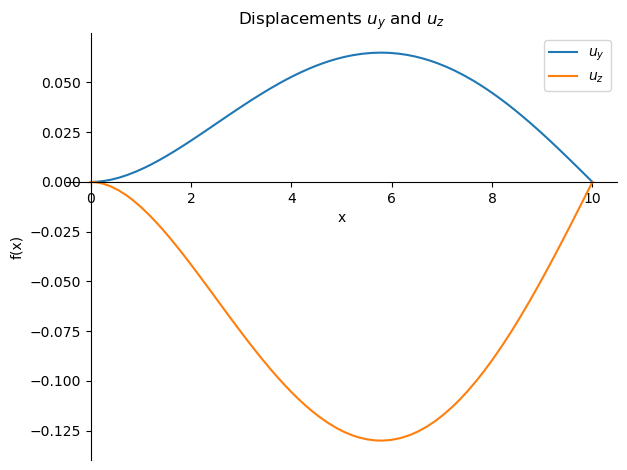

In [10]:
plot1 = sp.plot(-uy_sub,(x,0,10),label='$u_y$',title="Displacements $u_y$ and $u_z$",show=False,legend=True)
plot2 = sp.plot(-uz_sub,(x,0,10),label='$u_z$',show=False)
plot1.append(plot2[0])
plot1.show()

Plot moments with a minus for visual positive values downwards: (this is normal beam behaviour)

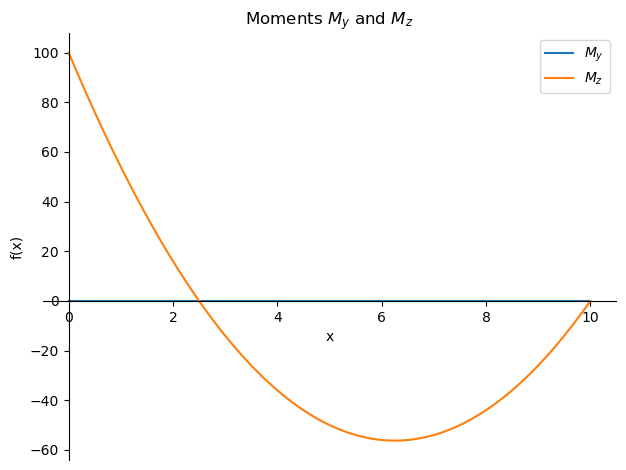

In [11]:
plot1 = sp.plot(-My_sub,(x,0,10),label='$M_y$',title="Moments $M_y$ and $M_z$",show=False,legend=True)
plot2 = sp.plot(-Mz_sub,(x,0,10),label='$M_z$',show=False)
plot1.append(plot2[0])
plot1.show()

In [12]:
display(My_sub.subs(x,0))
display(Vy_sub.subs(x,0))
display(Mz_sub.subs(x,0))
display(Vz_sub.subs(x,0))

0

0

-100

50.0000000000000

In [13]:
display(uy_sub.subs(x,5))
display(uz_sub.subs(x,5))
display(My_sub.subs(x,5))
display(Mz_sub.subs(x,5))

-0.0625000000000000

0.125000000000000

0

50